In [80]:
# After we collect the data, we wish to obtain the approximate true underlying phenomenon hidden behind our data. 

# Therefore, we need to learn a model. There are commonly three different types of "Learning". 

# Firstly, supervised learning, which means for each response variable 'y', 
# there would be a corresponding independent value 'x'. 

# Secondly, unsupervised learning, which is the opposite of supervised learning as every response variable 'y', 
# does not pair a corresponding independent value 'x. 

# Thirdly, semi-supervised learning, which locates between supervised learning and unsupervised learning. 

# In other words, for some response variables 'y', there would be a corresponding independent value 'x'. However, others do not.

# In our study, we wish to figure out consumer charging behaviour patterns by using some features related to this. 

# Thus, our group chose 'supervised learning' in the following analysis. 


In [81]:
# In addition, within supervised learning, there are also two main types. 

# One called 'Regression', the other one called 'Classification'. 

# The main difference between these two methods is that for regression, we use a continuous response variable, 
# while for classification, we would use a categorical response variable. 

# To be more specific, a regression method could solve the problems for example, 
# 'What would be the rainfall amount for tomorrow?'. 
# While, for a classification method, it could solve the problem such as 'Does Jack want to drink tea, coffee or cola?'.

# In our case, we have lots of categorical response variables. 

# Thus, in the following analysis, classification would be our main method.

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [83]:
# Reading data
# 'Care with path'
# df = pd.read_csv(r"C:\Users\danie\Desktop\Projects\Demola\dataDemola.csv")
df = pd.read_csv(r"../dataDemola.csv")

In [84]:
# First 5 rows of our data
df.head()

,ID_Session,Session_Duration,Connection_Time,ID_User,Charging_Speed
0,1,177,176,2,1
1,2,889,875,4,2
2,3,567,136,2,2
3,4,503,604,4,1
4,5,355,386,2,1


In [85]:
# Dataset Dimensions

df.shape

(100, 5)

In [86]:
# Check Nulls
# If there any nulls, look for method to delete that records

df.isnull().sum()

ID_Session          0
Session_Duration    0
Connection_Time     0
ID_User             0
Charging_Speed      0
dtype: int64

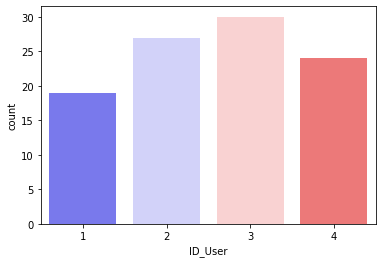

In [87]:
# Show number os sessions by user
sns.countplot(x="ID_User", data=df, palette="bwr")
plt.show()

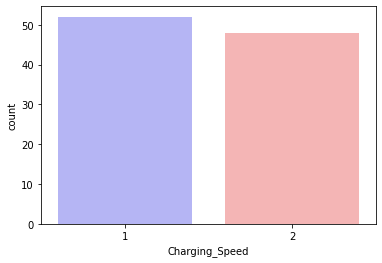

In [88]:
# Show number os sessions by user
sns.countplot(x="Charging_Speed", data=df, palette="bwr")
plt.show()

In [89]:
# Declare feature vector and target variable

x = df.drop(['Charging_Speed'], axis=1)
y = df['Charging_Speed']

In [90]:
# Split data into separate training and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [91]:
# Shape of x_train and x_test (70/30)

x_train.shape, x_test.shape

((70, 4), (30, 4))

In [92]:
# Import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 

In [93]:
# Create DecisionTree
# Look for max_depth (ramifications)

dt = tree.DecisionTreeClassifier(max_depth=2)
dt = dt.fit(x, y)

In [94]:
# Define the features, and creathe the graph for DecisionTree

dtFeatureNames = list(x.columns)
dot_data = tree.export_graphviz(dt, out_file=None, 
                      feature_names=dtFeatureNames,
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data, format="png") 

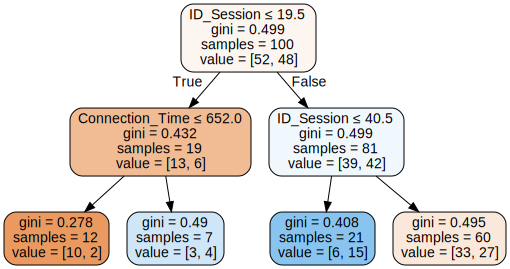

In [95]:
graph

In [96]:
# Accuracy & Precision

from sklearn.metrics import accuracy_score, precision_score
y_pred=dt.predict(x_test)
print('---Scores:---')
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))

---Scores:---
Accuracy: 0.733
Precision: 0.762


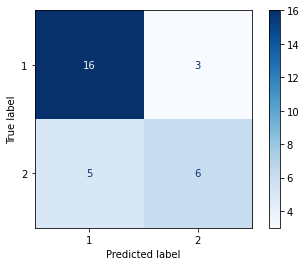

In [97]:
# Confusion Matrix

from sklearn.metrics import plot_confusion_matrix
disp_confusion_matrix = plot_confusion_matrix (dt, x_test, y_test, cmap=plt.cm.Blues)

In [98]:
# Define New Input to Predict

new_input = [[101, 100, 400, 3]]

In [99]:
# Get Prediction for new Input

new_output = dt.predict(new_input)

In [100]:
# Summarize Input and Output
print(new_input, new_output)

[[101, 100, 400, 3]] [1]


In [101]:
# Define New Input2 to Predict

new_input2 = [[40, 100, 800, 3]]

In [102]:
# Get Prediction for new Input2

new_output2 = dt.predict(new_input2)

In [103]:
# Summarize Input2 and Output2

print(new_input2, new_output2)

[[40, 100, 800, 3]] [2]
